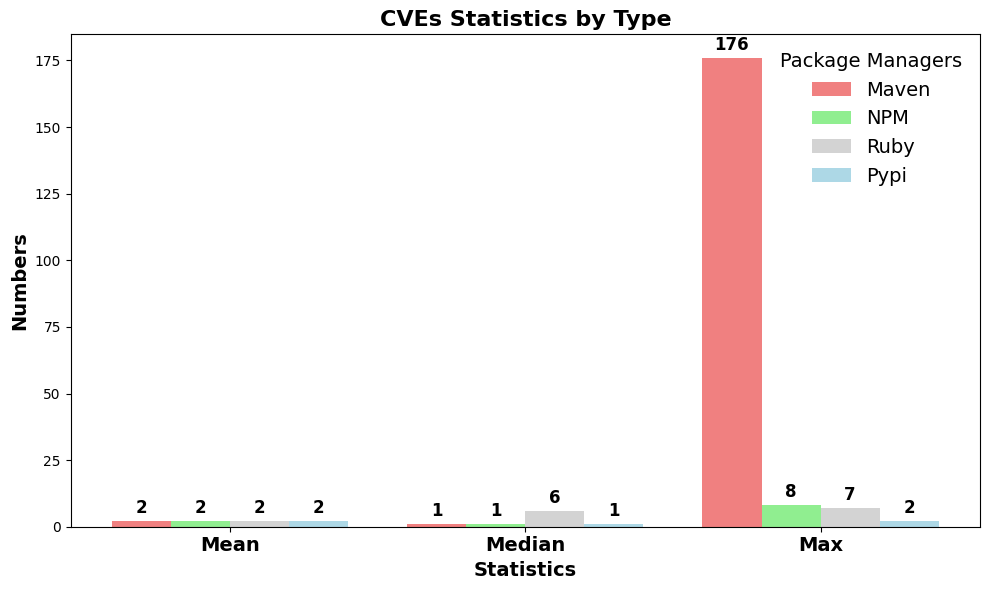

In [15]:
import matplotlib.pyplot as plt
import numpy as np

mean_cves = {
    "Maven": 2, 
    "NPM": 2, 
    "Ruby": 2, 
    "Pypi": 2
}
max_cves = {
    "Maven": 176, 
    "NPM": 8, 
    "Ruby": 7, 
    "Pypi": 2
}
med_cves = {
    "Maven": 1, 
    "NPM": 1, 
    "Ruby": 6, 
    "Pypi": 1
}

categories = list(mean_cves.keys())
x_labels = ['Mean', 'Median', 'Max']
data = {
    'Maven': [mean_cves['Maven'], med_cves['Maven'], max_cves['Maven']],
    'NPM': [mean_cves['NPM'], med_cves['NPM'], max_cves['NPM']],
    'Ruby': [mean_cves['Ruby'], med_cves['Ruby'], max_cves['Ruby']],
    'Pypi': [mean_cves['Pypi'], med_cves['Pypi'], max_cves['Pypi']]
}

# Define the light color scheme for each category
colors = ['lightcoral', 'lightgreen', 'lightgrey', 'lightblue']

bar_width = 0.2
x = np.arange(len(x_labels))  # 标签位置

fig, ax = plt.subplots(figsize=(10, 6))

# Plot each dataset with the assigned color
for i, (label, values) in enumerate(data.items()):
    ax.bar(x + i * bar_width, values, bar_width, label=label, color=colors[i])

ax.set_xlabel('Statistics', fontsize=14, fontweight='bold')
ax.set_ylabel('Numbers', fontsize=14, fontweight='bold')
ax.set_title('CVEs Statistics by Type', fontsize=16, fontweight='bold')
ax.set_xticks(x + bar_width * 1.5)  # 中心对齐x轴标签
ax.set_xticklabels(x_labels, fontsize=14, fontweight='bold')
ax.legend(title='Package Managers', fontsize=14, title_fontsize=14, loc='upper right', frameon=False)

def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),  # 3点的垂直偏移
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=12, fontweight='bold')

# Add labels to each group of bars
for i in range(len(data)):
    add_labels(ax.patches[i * len(x_labels):(i + 1) * len(x_labels)])

plt.tight_layout()
plt.show()

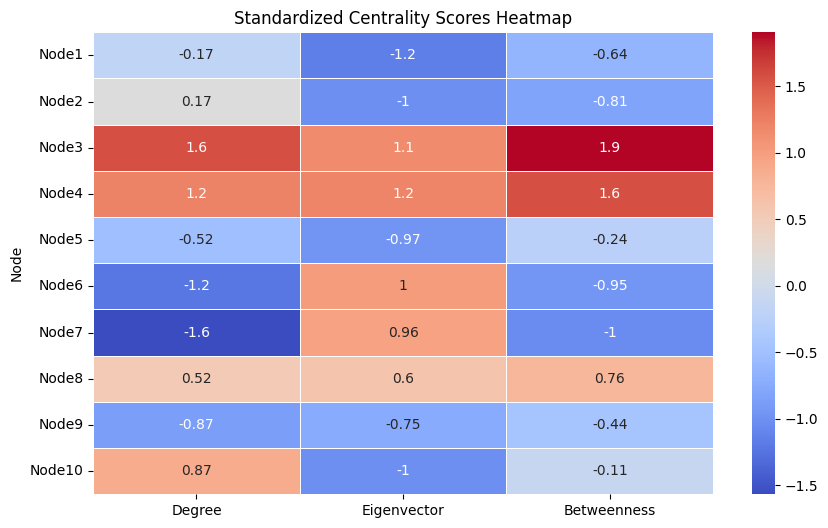

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Fake centrality data for top-10 nodes
data = {
    'Node': ['Node1', 'Node2', 'Node3', 'Node4', 'Node5', 'Node6', 'Node7', 'Node8', 'Node9', 'Node10'],
    'Degree': [35, 40, 60, 55, 30, 20, 15, 45, 25, 50],
    'Eigenvector': [0.05, 0.1, 0.9, 0.92, 0.12, 0.85, 0.83, 0.7, 0.2, 0.1],
    'Betweenness': [120, 95, 500, 450, 180, 75, 60, 330, 150, 200]
}

# Convert the data into a DataFrame
df = pd.DataFrame(data)

# Standardize the centrality values
scaler = StandardScaler()
df[['Degree', 'Eigenvector', 'Betweenness']] = scaler.fit_transform(df[['Degree', 'Eigenvector', 'Betweenness']])

# Set 'Node' as the index for a cleaner heatmap
df.set_index('Node', inplace=True)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Standardized Centrality Scores Heatmap')
plt.show()

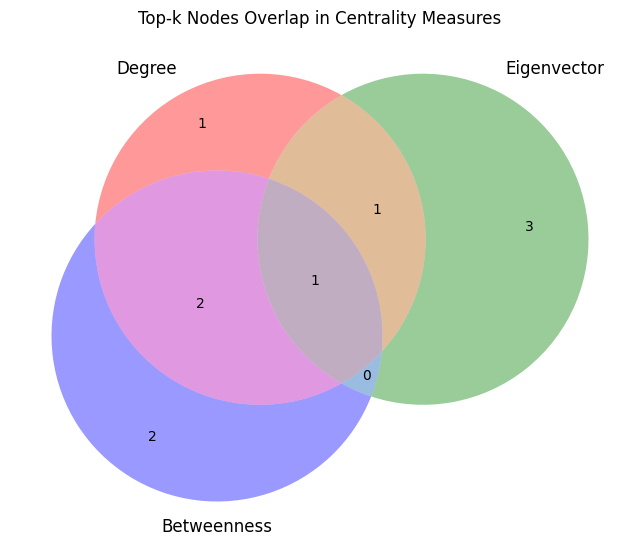

In [8]:
from matplotlib_venn import venn3
import matplotlib.pyplot as plt

# Fake top-k sets
degree_top_k = {'Node1', 'Node2', 'Node3', 'Node4', 'Node5'}
eigenvector_top_k = {'Node3', 'Node4', 'Node6', 'Node7', 'Node8'}
betweenness_top_k = {'Node2', 'Node3', 'Node5', 'Node9', 'Node10'}

# Plotting Venn diagram
plt.figure(figsize=(8, 8))
venn = venn3([degree_top_k, eigenvector_top_k, betweenness_top_k], 
             ('Degree', 'Eigenvector', 'Betweenness'))
plt.title("Top-k Nodes Overlap in Centrality Measures")
plt.show()